In [226]:
%config IPCompleter.greedy=True
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# !pip install --no-cache-dir openpyxl

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# change current directory
cwd = os.getcwd()
print(cwd)
os.chdir('../archive')

# read dataframe
phai_nop = pd.read_excel('Q7.xlsx', sheet_name='Phai_nop')
sao_ke = pd.read_excel('Q7.xlsx', sheet_name='Sao_ke')



/home/phuoc/work/archive


In [228]:

phai_nop_headers = {
    'Tháng': 'Thang',
    'Ngày tạo phiếu thu ': 'Ngay tao phieu thu',
    'Ngày nộp tiền': 'Ngay nop tien',
    'Tiền phải nộp': 'Tien phai nop',
}
phai_nop = phai_nop.rename(columns=phai_nop_headers)
# phai_nop.head()
phai_nop.tail()

,Thang,Ngay tao phieu thu,Ngay nop tien,Tien phai nop
324,11,2020-11-27,2020-11-28,718664454
325,11,2020-11-28,2020-11-29,458550141
326,11,2020-11-29,2020-11-30,111888463
327,12,2020-11-30,2020-12-01,1224277567
328,12,2020-12-01,2020-12-02,818780093


Text(0.5, 0.98, 'Tien phai nop 2020')

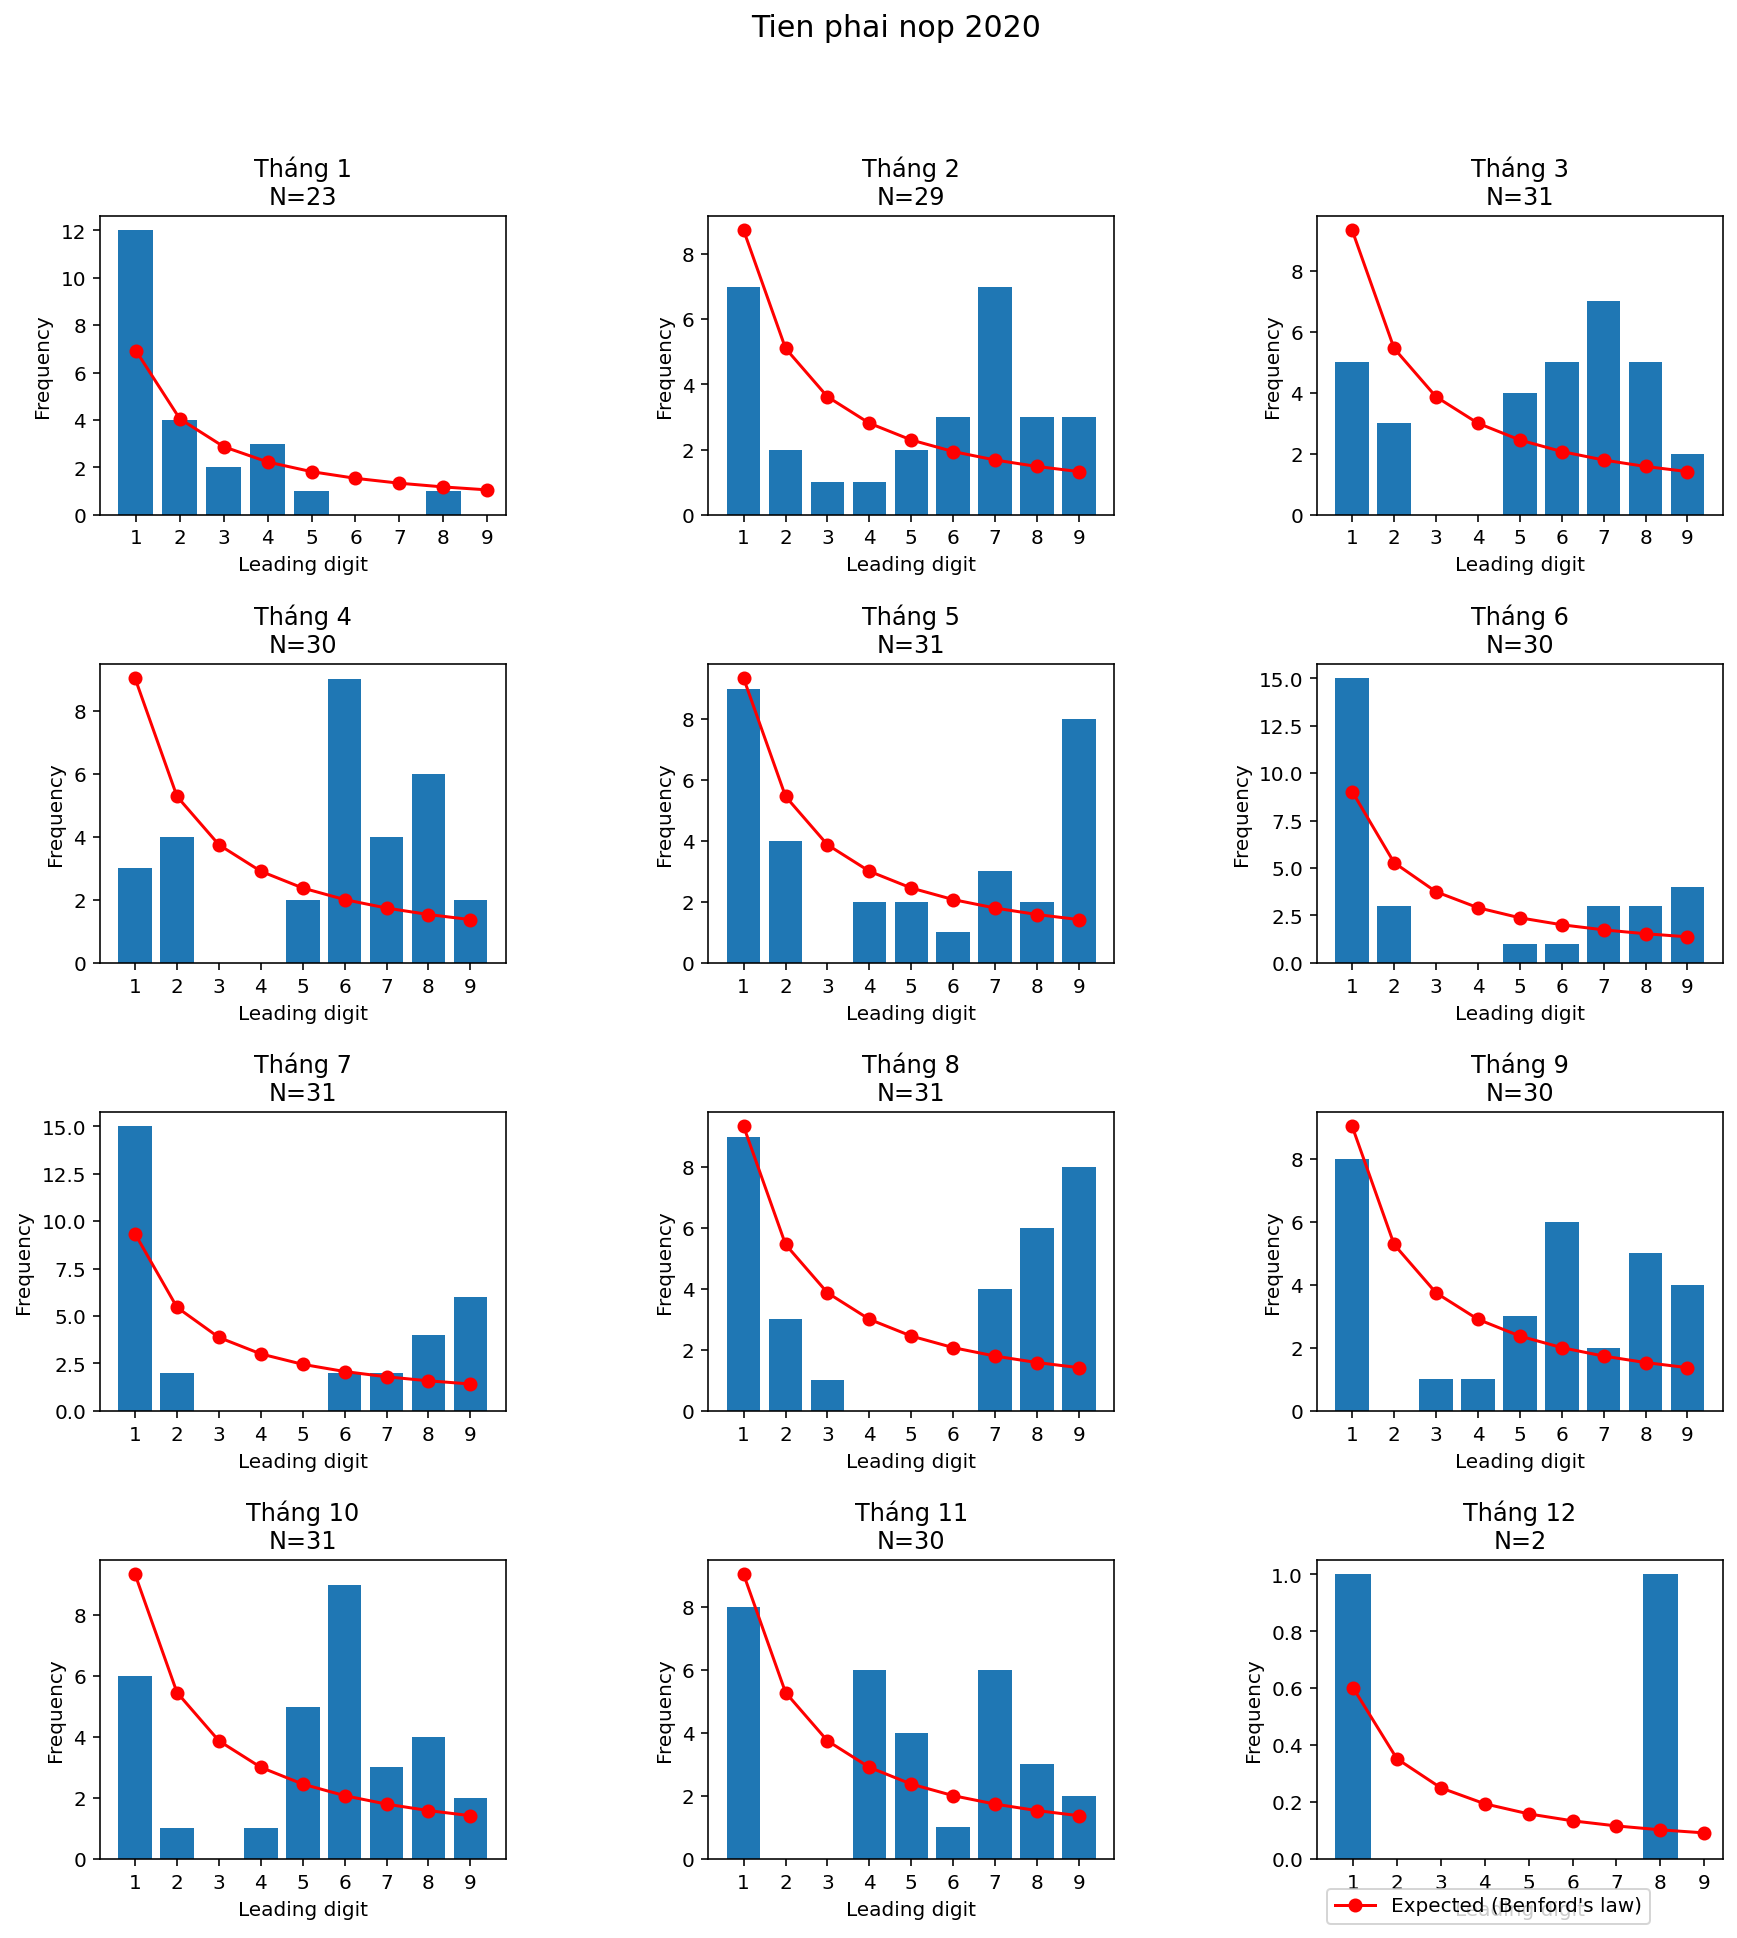

In [229]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

axs = np.array(axs).flatten()


plt.subplots_adjust(hspace=0.5, wspace=0.5)

# check with benford's law
digit = np.arange(1, 10)

months = phai_nop['Thang'].unique()
# print(type(months))

for i in range(len(axs)):
    ax = axs[i]
    
    data = phai_nop.groupby(['Thang', 'Ngay nop tien']).sum()
    # print(data)
    month = months[i]
    # print(month)
    digits = data.loc[month]['Tien phai nop'].astype(str).str[0].astype(int)
    # print(digits)
    
    N = len(phai_nop[phai_nop['Thang'] == month]['Ngay nop tien'])  # len for each month
    # print(f'Thang: {month} - {N}')
    expected = np.log10(1 + 1/digit)*N  # => expected number of digit following benford's law
    
    v = digits.value_counts()
    # print(v)
    ax.bar(v.index, v.values)  # plot following probability of the number of digits in month
    ax.set_xticks(range(1, 10))
    
    ax.plot(digit, expected, marker='o', color='red', label='Expected (Benford\'s law)')
    ax.set_title("Tháng %s\nN=%d" % (month, N))
    ax.set_xlabel("Leading digit")
    ax.set_ylabel("Frequency")
    
plt.legend(loc=3, bbox_to_anchor=(0.0, -0.25))
plt.suptitle("Tien phai nop 2020", fontsize=15)

In [230]:
del sao_ke['TK nộp ']
del sao_ke['Ngày đúng']
del sao_ke['Code']
sao_ke_headers = {
    'Tháng': 'Thang',
    'Ngày nộp tiền': 'Ngay nop tien',
    'Số tiền': 'So tien',
    'Ngân hàng': 'Ngan hang',
    'Nội dung': 'Noi dung',
}

sao_ke = sao_ke.rename(columns=sao_ke_headers)
sao_ke.head()
sao_ke.tail()

,Thang,Ngay nop tien,So tien,Ngan hang,Noi dung
783,12,2020-12-01,364000,TCB,Bc 2275 nop cod ngay 28.11
784,12,2020-12-01,505342000,MB,2275 NOP COD GHN 30.11 THU TAI KHO
785,12,2020-12-01,44000,TCB,BC 2275 nop cod ngay 29.11
786,12,2020-12-02,250000000,MB,2275 quan 7 nop cod ngay 30 11 - Ma giao dich...
787,12,2020-12-02,300000000,MB,2275 quan 7 nop cod ngay 30 11 - Ma giao dich...


Text(0.5, 0.98, 'Tien thuc nop 2020')

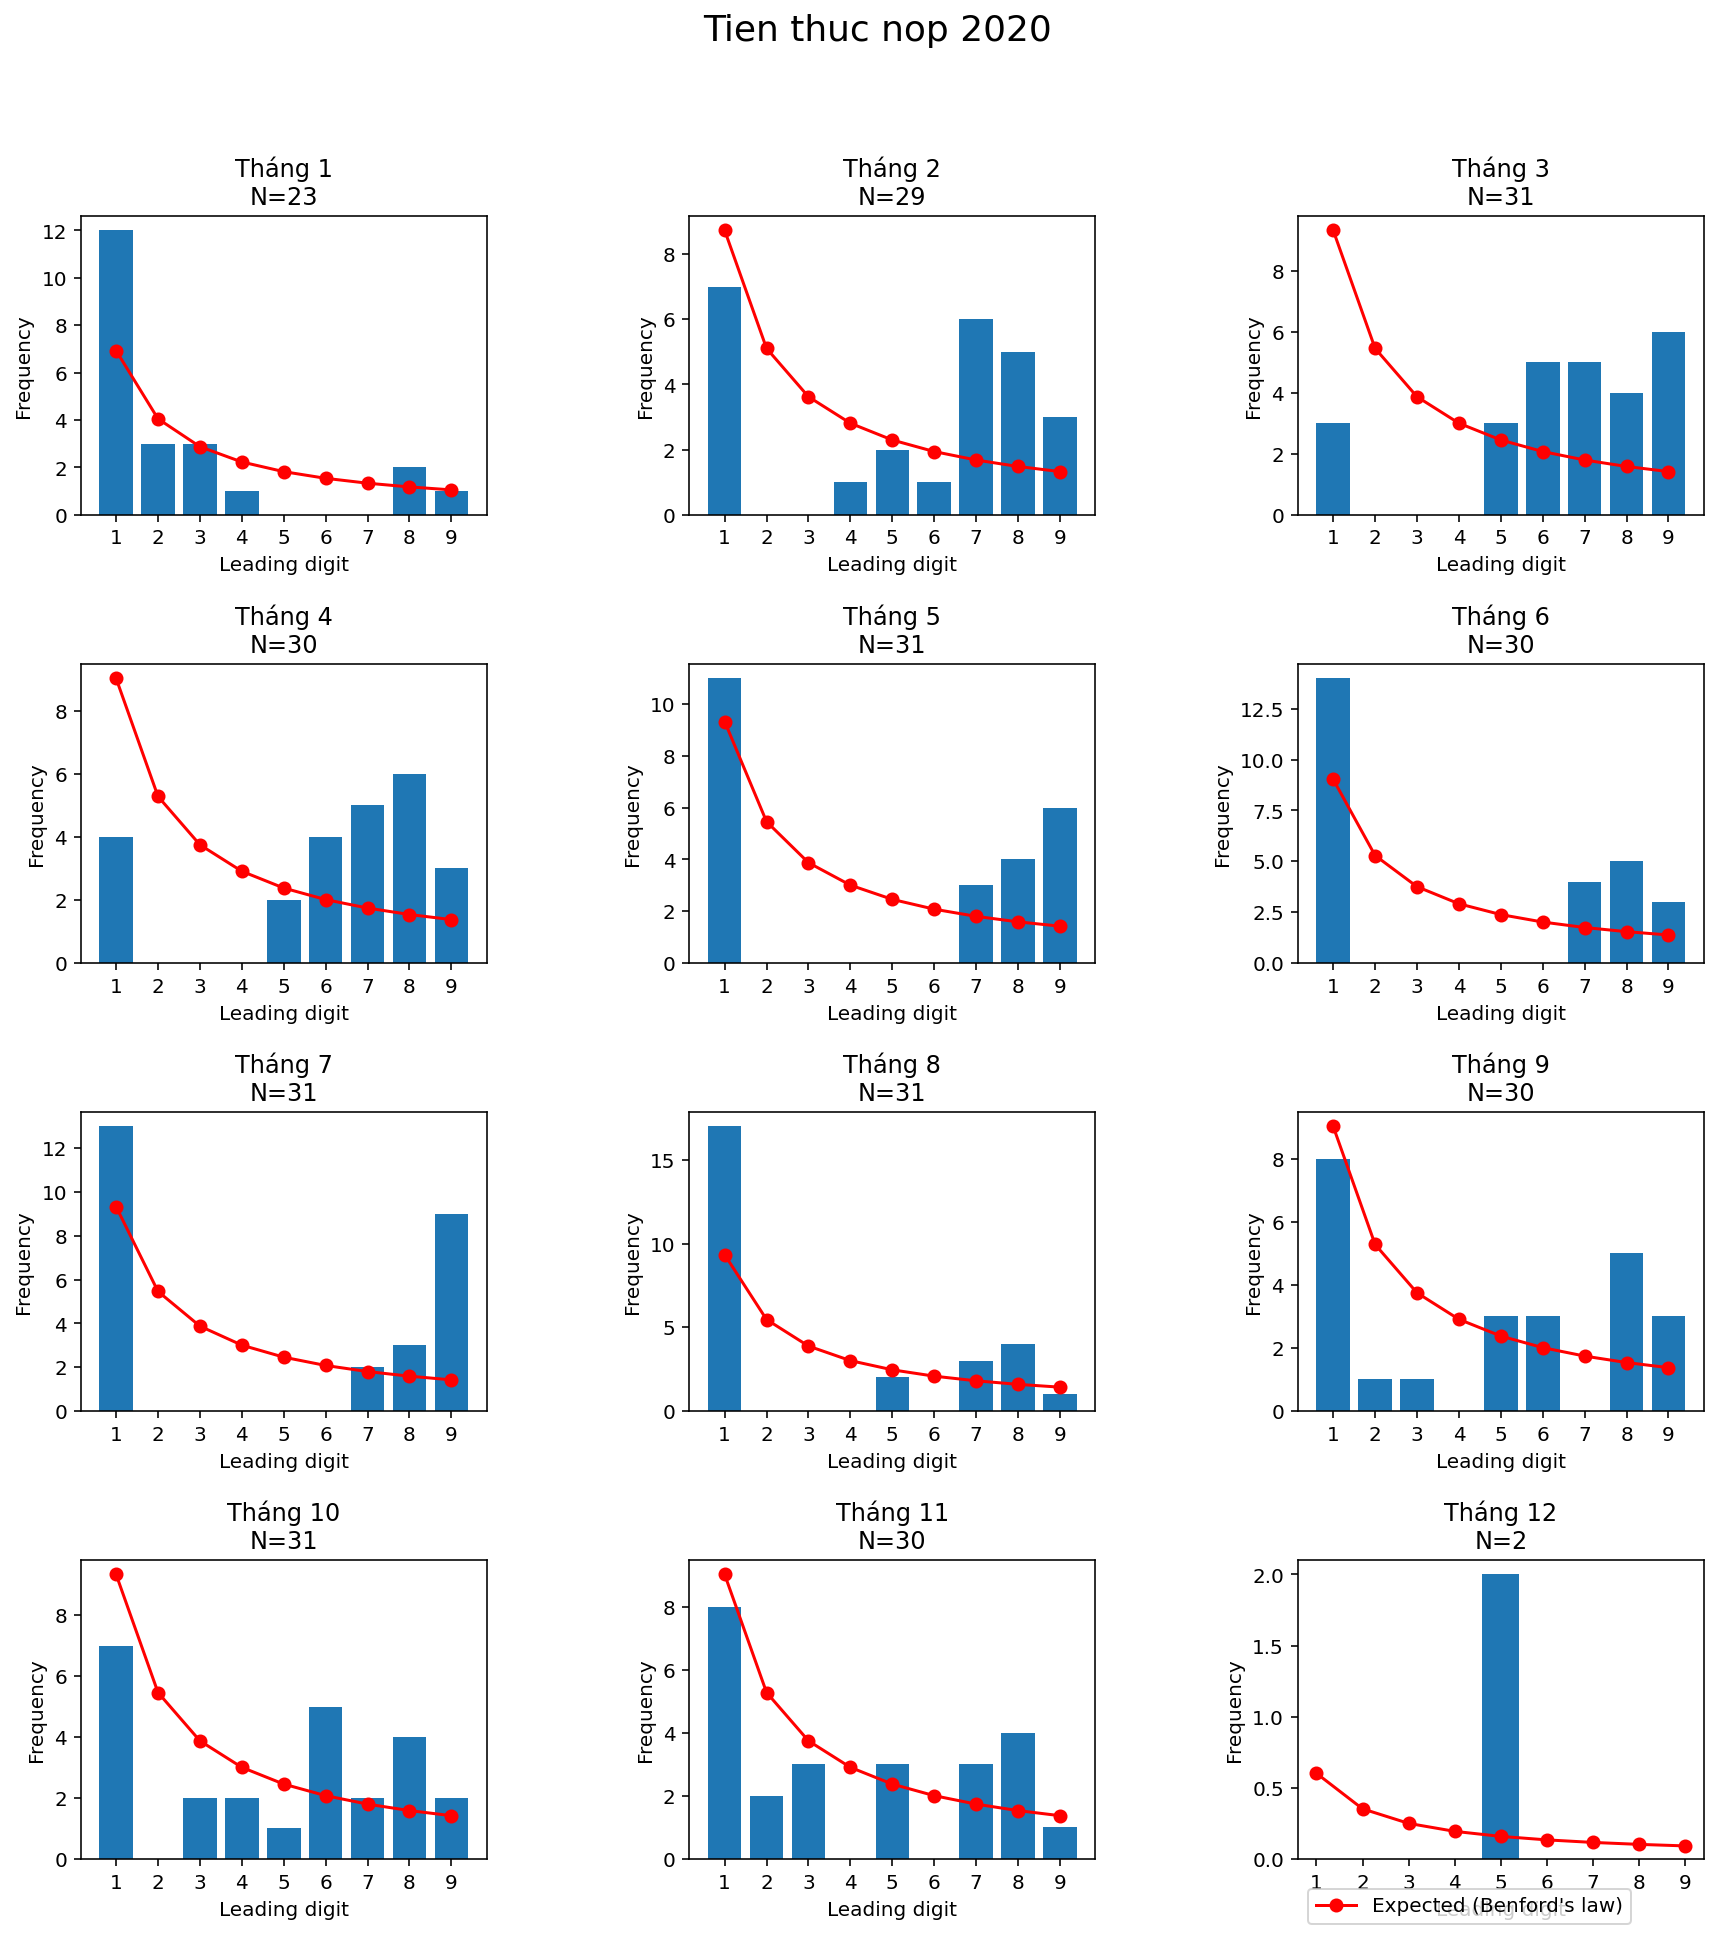

In [235]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

axs = np.array(axs).flatten()


plt.subplots_adjust(hspace=0.5, wspace=0.5)

# check with benford's law
digit = np.arange(1, 10)

months = sao_ke['Thang'].unique()
# print(type(months))

for i in range(len(axs)):
    ax = axs[i]
    
    data = sao_ke.groupby(['Thang', 'Ngay nop tien']).sum()
    # print(data)
    month = months[i]
    # print(month)
    digits = data.loc[month]['So tien'].astype(str).str[0].astype(int)
    # print(digits)
    
    N = len(phai_nop[phai_nop['Thang'] == month]['Ngay nop tien'])  # len for each month
    # print(f'Thang: {month} - {N}')
    expected = np.log10(1 + 1/digit)*N  # expected number of digit following benford's law
    
    v = digits.value_counts()
    # print(v)
    ax.bar(v.index, v.values)  # plot following probability of the number of digits in month
    ax.set_xticks(range(1, 10))
    
    ax.plot(digit, expected, marker='o', color='red', label='Expected (Benford\'s law)')
    ax.set_title("Tháng %s\nN=%d" % (month, N))
    ax.set_xlabel("Leading digit")
    ax.set_ylabel("Frequency")
    

plt.legend(loc=3, bbox_to_anchor=(0.0, -0.25))
plt.suptitle("Tien thuc nop 2020", fontsize=18)